# <font color='#d50283'>IT Academy - Data Science Itinerary</font>
## Sprint 4 - Task 2 - Graphic Visualization of Multiple Variables
### Assignment by: Kat Weissman

#### Python Learning Objectives:
- Visualization of Multiple variables
- Categorical Data
- Box-Plots

*Recommended learning resources:*
- *Notebook by Alex Kumenius:* https://github.com/IT-Academy-BCN/Data-Science/blob/main/Examining-Data/03%20EXAMINING%20DATA.ipynb
- *Overview of Seaborn: https://seaborn.pydata.org/tutorial/function_overview.html*
- *Seaborn Gallery: https://seaborn.pydata.org/examples/index.html*


### Exercise 1
Practice the notebook on GitHub "03 EXAMINING DATA" with seaborn and the dataset "tips".
- *Notebook by Alex Kumenius:* https://github.com/IT-Academy-BCN/Data-Science/blob/main/Examining-Data/03%20EXAMINING%20DATA.ipynb

### Exercise 2
Repeat exercise 1 with the dataset in the GitHub PRE-PROCESSING-DATA repository, movies.dat

https://github.com/IT-Academy-BCN/Data-Science/blob/main/Pre-processing-data/movies.dat

In [1]:
#Import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
#Read data
data_link = 'https://raw.githubusercontent.com/IT-Academy-BCN/Data-Science/main/Pre-processing-data/movies.dat'
df = pd.read_table(data_link,sep='::', header=None, engine='python',encoding='latin-1')

In [3]:
#Show number of rows and columns in dataframe
df.shape

(3883, 3)

In [4]:
#Show column names
df.columns

Int64Index([0, 1, 2], dtype='int64')

In [5]:
#Display first 5 rows of dataframe
df.head(5)

,0,1,2
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [6]:
#Name columns
df.columns=['ID','Movie','Genre']

In [7]:
#Split year into its own column
df[['Movie', 'Year']] = df['Movie'].str.rsplit(pat='(', n=1, expand=True)

In [8]:
df.head(5)

,ID,Movie,Genre,Year
0,1,Toy Story,Animation|Children's|Comedy,1995)
1,2,Jumanji,Adventure|Children's|Fantasy,1995)
2,3,Grumpier Old Men,Comedy|Romance,1995)
3,4,Waiting to Exhale,Comedy|Drama,1995)
4,5,Father of the Bride Part II,Comedy,1995)


In [9]:
#remove last ')' from the Year column and convert to int
df.Year = df.Year.str[:-1].astype(int)

In [10]:
#convert Genre entries into list of Genres
df.Genre=df.Genre.str.split('|').tolist()

In [11]:
df.head(5)

,ID,Movie,Genre,Year
0,1,Toy Story,"[Animation, Children's, Comedy]",1995
1,2,Jumanji,"[Adventure, Children's, Fantasy]",1995
2,3,Grumpier Old Men,"[Comedy, Romance]",1995
3,4,Waiting to Exhale,"[Comedy, Drama]",1995
4,5,Father of the Bride Part II,[Comedy],1995


In [12]:
#Checking dataset variables
df.dtypes

ID        int64
Movie    object
Genre    object
Year      int64
dtype: object

In [13]:
#View summary statistics of each variable.
df.ID.describe()

count    3883.000000
mean     1986.049446
std      1146.778349
min         1.000000
25%       982.500000
50%      2010.000000
75%      2980.500000
max      3952.000000
Name: ID, dtype: float64

In [14]:
df.Movie.describe()

count        3883
unique       3841
top       Hamlet 
freq            5
Name: Movie, dtype: object

In [15]:
df.Genre.describe()

count        3883
unique        301
top       [Drama]
freq          843
Name: Genre, dtype: object

Since each movie can have more than one genre, the genres are stored in a list in the Genre column. There are 301 unique combinations of genres for movies in our list. We'll look at a better way of visualizing genres later.

In [16]:
df.Year.describe()

count    3883.000000
mean     1986.066959
std        16.895690
min      1919.000000
25%      1982.000000
50%      1994.000000
75%      1997.000000
max      2000.000000
Name: Year, dtype: float64

1994 is the median year, which means at some point in 1994 there were as many movie releases from 1919-1994 as there would be from 1994-2000.

In [17]:
#define Seaborn color palette to use
colors = sns.color_palette("pastel")

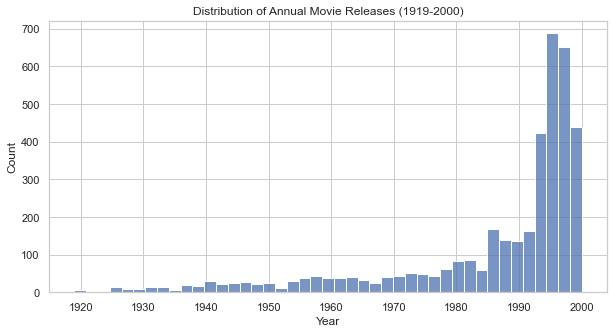

In [18]:
#Histogram of the Year variable
sns.set(rc={'figure.figsize':(10,5)},style="whitegrid")
sns.histplot(data=df, x="Year")
plt.title('Distribution of Annual Movie Releases (1919-2000)')
plt.show()

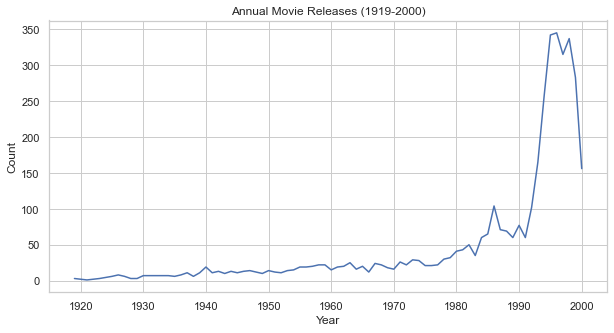

In [19]:
#Line plot of the number of movies released per year
sns.lineplot(data=df.Year.value_counts())
plt.ylabel('Count')
plt.xlabel('Year')
plt.title('Annual Movie Releases (1919-2000)')
plt.show()

From the histogram and line chart, we can see that the movie industry began releasing significantly move movies per year in the 1990's.

In [20]:
#Summary statistics of number of movies released per year
df.Year.value_counts().describe()

count     81.000000
mean      47.938272
std       81.786360
min        1.000000
25%       11.000000
50%       19.000000
75%       35.000000
max      345.000000
Name: Year, dtype: float64

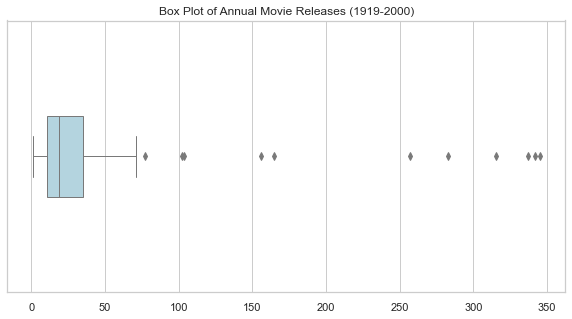

In [21]:
sns.boxplot(x=df.Year.value_counts(), color='lightblue', fliersize=5, linewidth=1 , width=0.3)
plt.title('Box Plot of Annual Movie Releases (1919-2000)')
plt.xlabel('')
plt.show()

Let's take a closer look at the annual movie releases.

In [22]:
#Create a data frame to track number of movie releases per year
annual_df = df.Year.value_counts()
annual_df = annual_df.sort_index()

Let's consider the last ten years of data in our data set.

In [23]:
#Number of movies released per year in last 10 years
annual_df[-10:]

1991     60
1992    102
1993    165
1994    257
1995    342
1996    345
1997    315
1998    337
1999    283
2000    156
Name: Year, dtype: int64

In [24]:
#Summary statistics of movies released per year in last 10 years
annual_df[-10:].describe()

count     10.000000
mean     236.200000
std      106.761208
min       60.000000
25%      158.250000
50%      270.000000
75%      331.500000
max      345.000000
Name: Year, dtype: float64

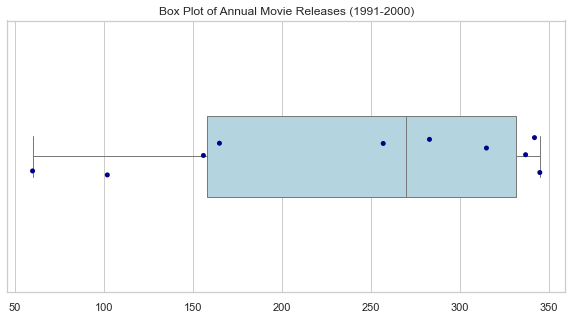

In [25]:
#Boxplot & strip plot of movie releases for last 10 years
sns.stripplot(x=annual_df[-10:], color='darkblue')
sns.boxplot(x=annual_df[-10:], color='lightblue', fliersize=5, linewidth=1 , width=0.3)
plt.title('Box Plot of Annual Movie Releases (1991-2000)')
plt.xlabel('')
plt.show()

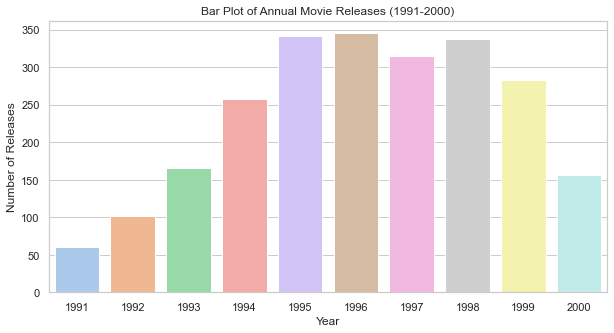

In [26]:
#Bar plot of movie releases for last 10 years
sns.barplot(y=annual_df[-10:],x=annual_df[-10:].index, palette=colors)
plt.title('Bar Plot of Annual Movie Releases (1991-2000)')
plt.xlabel('Year')
plt.ylabel('Number of Releases')
plt.show()

1995, 1996, and 1998 were the years with the most movie releases.

I would like to visualize data related to movie genres, however the data type is a little complicated. Each movie can have more than one genre, which I stored as a list in the Genre column fore each movie.

Reference: https://towardsdatascience.com/dealing-with-list-values-in-pandas-dataframes-a177e534f173

In [27]:
def to_1D(series):
 return pd.Series([x for _list in series for x in _list])

In [28]:
Genre_counts = to_1D(df.Genre)

Now we can look at more accurate summary statistics for Genre.

In [29]:
Genre_counts.describe()

count      6408
unique       18
top       Drama
freq       1603
dtype: object

In [30]:
#Number of movies tagged as certain genre
Genre_counts.value_counts()

Drama          1603
Comedy         1200
Action          503
Thriller        492
Romance         471
Horror          343
Adventure       283
Sci-Fi          276
Children's      251
Crime           211
War             143
Documentary     127
Musical         114
Mystery         106
Animation       105
Fantasy          68
Western          68
Film-Noir        44
dtype: int64

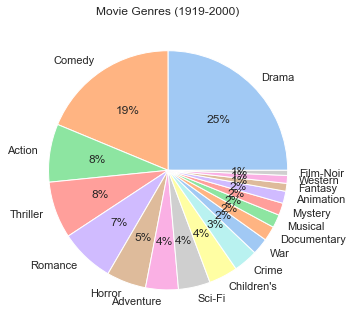

In [31]:
#Pie chart of movie genres
sns.set(rc={'figure.figsize':(5.5,5.5)},style="whitegrid")

#define data
data = Genre_counts.value_counts()
labels = Genre_counts.value_counts().index

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title("Movie Genres (1919-2000)")
plt.show()

The following word cloud references were used to generate word clouds below.
- https://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html
- https://www.python-graph-gallery.com/wordcloud/

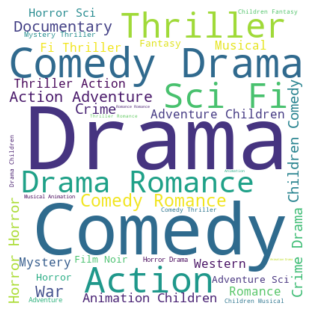

In [32]:
# Create word cloud of movie genres
# Libraries
from wordcloud import WordCloud

# Create a list of words
text = (' '.join(Genre_counts))

# Create the wordcloud object
wordcloud = WordCloud(background_color="white",width=400, height=400).generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

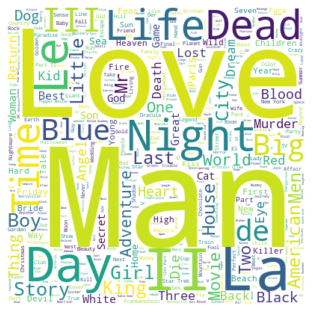

In [33]:
# Create word cloud of movie titles
# Create a list of words
text = (' '.join(df.Movie))

# Create the wordcloud object
wordcloud = WordCloud(background_color="white",width=400, height=400,max_words=2000).generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()